In [1]:
from functools import cache

import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

## explore data

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
max([max(sequence) for sequence in train_data])

9999

In [6]:
@cache
def get_reverse_word_index():
    word_index = imdb.get_word_index()
    reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
    return reverse_word_index


def decode_to_text(encoded_review):
    reverse_word_index = get_reverse_word_index()
    decoded_review = " ".join(
        [reverse_word_index.get(i - 3, "?") for i in encoded_review]
    )
    return decoded_review

In [7]:
for i in range(5):
    print(f"{i=}")
    print(f"{train_labels[i]=}")
    print(decode_to_text(train_data[i]))
    print("\n")

i=0
train_labels[i]=1
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they h

## prepare data
> Multi-hot encode

In [8]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.0
    return results

In [9]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [11]:
x_train[0].shape

(10000,)

In [12]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

## build model

In [13]:
model = keras.Sequential(
    [
        layers.Dense(16, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

Metal device set to: Apple M1 Max


2023-01-24 21:35:47.154448: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-24 21:35:47.154598: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [14]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [15]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val),
)

Epoch 1/20


2023-01-24 21:35:47.423931: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


 1/30 [>.............................] - ETA: 10s - loss: 0.6934 - accuracy: 0.4707

2023-01-24 21:35:47.625313: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 1s 23ms/step - loss: 0.5060 - accuracy: 0.7893 - val_loss: 0.3813 - val_accuracy: 0.8706
Epoch 2/20
 1/30 [>.............................] - ETA: 0s - loss: 0.3098 - accuracy: 0.9277

2023-01-24 21:35:48.287506: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 0s 12ms/step - loss: 0.3039 - accuracy: 0.9026 - val_loss: 0.3094 - val_accuracy: 0.8809
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2236 - accuracy: 0.9284 - val_loss: 0.2829 - val_accuracy: 0.8893
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1796 - accuracy: 0.9403 - val_loss: 0.2723 - val_accuracy: 0.8907
Epoch 5/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1458 - accuracy: 0.9539 - val_loss: 0.2774 - val_accuracy: 0.8879
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1197 - accuracy: 0.9639 - val_loss: 0.2887 - val_accuracy: 0.8863
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0997 - accuracy: 0.9702 - val_loss: 0.3309 - val_accuracy: 0.8763
Epoch 8/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0851 - accuracy: 0.9764 - val_loss: 0.3215 - val_accuracy: 0.8814
Epoch 9/20
30/30 [======

In [16]:
def vis_acc(history):
    xs = list(range(1, 1 + len(history.history["accuracy"])))
    plt.plot(xs, history.history["accuracy"], label="training accuracy")
    plt.plot(xs, history.history["val_accuracy"], label="validation accuracy")
    plt.legend(loc="lower right")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.xlim(1, len(xs))
    plt.show()


def vis_loss(history):
    xs = list(range(1, 1 + len(history.history["loss"])))
    plt.plot(xs, history.history["loss"], label="training loss")
    plt.plot(xs, history.history["val_loss"], label="validation loss")
    plt.legend(loc="lower right")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.xlim(1, len(xs))
    plt.show()

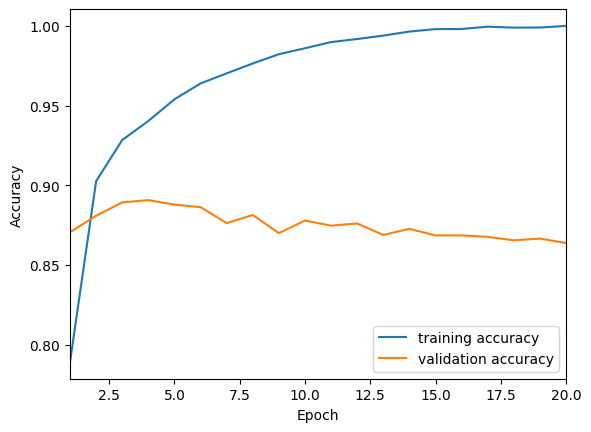

In [17]:
vis_acc(history)

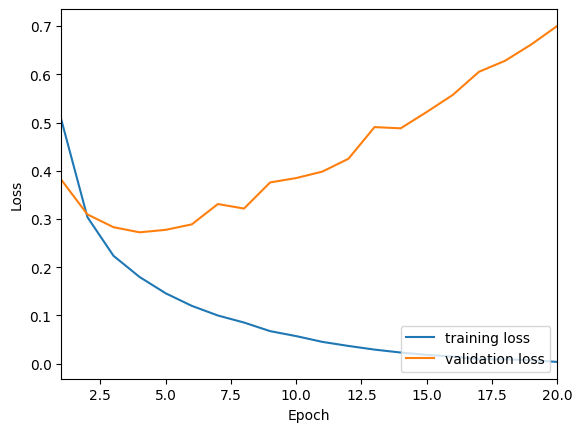

In [18]:
vis_loss(history)

## retrain to avoid overfitting

In [19]:
model = keras.Sequential(
    [
        layers.Dense(16, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=4,
    batch_size=512,
    validation_data=(x_val, y_val),
)
results = model.evaluate(x_test, y_test)

Epoch 1/4
 8/30 [=======>......................] - ETA: 0s - loss: 0.6382 - accuracy: 0.6821

2023-01-24 21:35:55.548703: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 1s 21ms/step - loss: 0.5238 - accuracy: 0.7903 - val_loss: 0.4028 - val_accuracy: 0.8703
Epoch 2/4
 1/30 [>.............................] - ETA: 0s - loss: 0.3636 - accuracy: 0.9141

2023-01-24 21:35:56.151587: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 0s 12ms/step - loss: 0.3234 - accuracy: 0.9018 - val_loss: 0.3177 - val_accuracy: 0.8838
Epoch 3/4
30/30 [==============================] - 0s 11ms/step - loss: 0.2377 - accuracy: 0.9262 - val_loss: 0.2843 - val_accuracy: 0.8914
Epoch 4/4
782/782 [==============================] - 3s 4ms/step - loss: 0.3607 - accuracy: 0.8501


In [20]:
results

[0.3607292175292969, 0.8501200675964355]

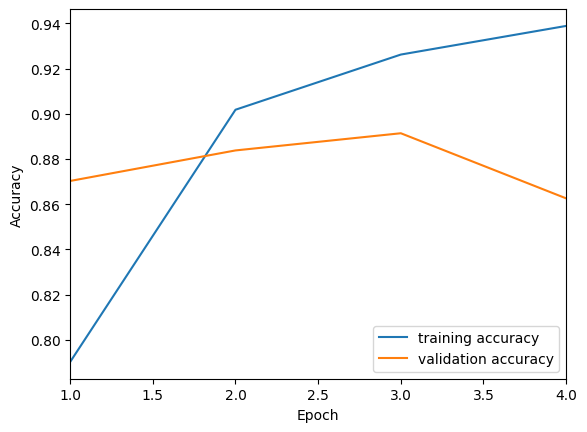

In [21]:
vis_acc(history)

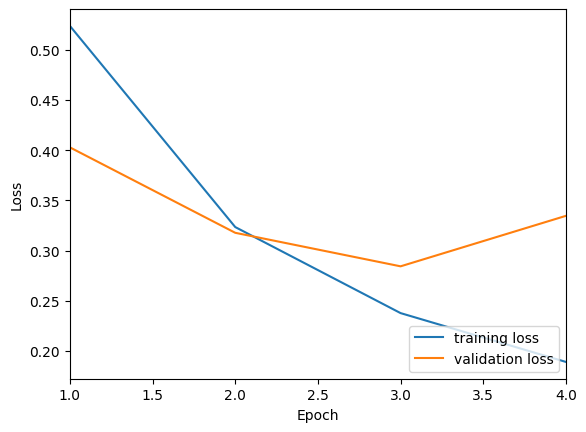

In [22]:
vis_loss(history)